The Guardian Balance: {'Male Mentions': 10505, 'Female Mentions': 1884}
Runners World Balance: {'Male Mentions': 13571, 'Female Mentions': 2757}
I Run Far Balance: {'Male Mentions': 37286, 'Female Mentions': 8736}


<Figure size 1000x600 with 0 Axes>

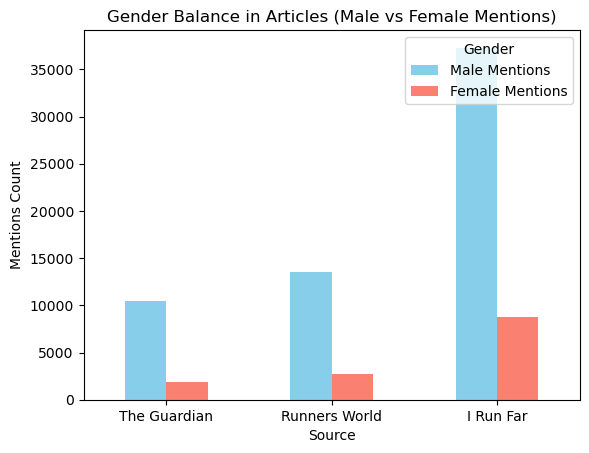

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
guardian_df = pd.read_csv('thegaurdian.csv')
runnersworld_df = pd.read_csv('runnersworld.csv')
irunfar_df = pd.read_csv('irunfar.csv')

# Define gender-specific keywords for analysis
male_keywords = ["he", "him", "his", "man", "male", "men", "boy", "guy"]
female_keywords = ["she", "her", "hers", "woman", "female", "women", "girl", "lady"]

# Function to check gender balance by counting occurrences of gender keywords
def gender_balance_check(df):
    # Standardize column names to lowercase
    df.columns = [col.lower() for col in df.columns]
    
    # Initialize counts
    male_count = 0
    female_count = 0
    
    # Count gender keywords in the "header" and "body" columns
    for _, row in df.iterrows():
        text = f"{row['header']} {row['body']}".lower()  # Combine Header and Body
        male_count += sum(text.count(word) for word in male_keywords)
        female_count += sum(text.count(word) for word in female_keywords)
    
    return {'Male Mentions': male_count, 'Female Mentions': female_count}

# Check gender balance in each file
guardian_balance = gender_balance_check(guardian_df)
runnersworld_balance = gender_balance_check(runnersworld_df)
irunfar_balance = gender_balance_check(irunfar_df)

# Combine results into a single dictionary for plotting
balance_data = {
    'The Guardian': guardian_balance,
    'Runners World': runnersworld_balance,
    'I Run Far': irunfar_balance
}

# Convert the results into a DataFrame for easier plotting
balance_df = pd.DataFrame(balance_data).T

# Display results
print("The Guardian Balance:", guardian_balance)
print("Runners World Balance:", runnersworld_balance)
print("I Run Far Balance:", irunfar_balance)

# Plot the results
plt.figure(figsize=(10, 6))
balance_df.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Balance in Articles (Male vs Female Mentions)')
plt.xlabel('Source')
plt.ylabel('Mentions Count')
plt.xticks(rotation=0)
plt.legend(title="Gender", loc='upper right')
plt.show()
